In [1]:
# Import Libraries
import matplotlib 
matplotlib.use('TkAgg')
from matplotlib import rc
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from matplotlib.lines import Line2D
from copy import deepcopy


In [2]:
# Read WCS Values in Sexadecimal (x and y) and Degree (xx and yy)

x = np.loadtxt('x_wcs.txt', dtype='string')
xx = np.loadtxt('x_wcs_deg.txt')
print 'x[0]=',x[0]

y = np.loadtxt('y_wcs.txt', dtype='string')
yy = np.loadtxt('y_wcs_deg.txt')
print 'y[0]=',y[0]

x[0]= 01h37m08.528s
y[0]= +15:43:27.91


In [3]:
# Set the Xaxis Ticks value 

# xxx is Defines with the deg+min/60 for each ticks wanted. 
# In this case it is 01h36m30s with step of 10s until 01h37m
xxx = [(1./24.)*360.+(36./(60.*24.))*360.+(30./(3600.*24.))*360.,\
       (1./24.)*360.+(36./(60.*24.))*360.+(40./(3600.*24.))*360.,\
       (1./24.)*360.+(36./(60.*24.))*360.+(50./(3600.*24.))*360.,\
       (1./24.)*360.+(37./(60.*24.))*360.+(00./(3600.*24.))*360.]
# xxxx is the Ticks value in String to inclue the h:m:s
xxxx=['36m30s','36m40s','36m50s','1h37m']
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
# xxxxx is the Array Position of the defined xxx Values in the Data WCS 
xxxxx = np.zeros(4)
for i in range(0,4) : 
    xxxxx[i]=np.where(xx == find_nearest(xx,xxx[i]))[0]

In [4]:
# Set the Yaxis Ticks value 

# yyy is Defines with the deg+min/60 for each ticks wanted. 
# In this case it is +15d44m with step of 2m until +15d54m
yyy = [15+(44./(60)),\
       15+(46./(60)),\
       15+(48./(60)),\
       15+(50./(60)),\
       15+(52./(60)),\
       15+(54./(60))]

# yyyy is the Ticks value in String to inclue the $\degree$ symbol
yyyy=['+15$\degree$44','+15$\degree$46','+15$\degree$48','+15$\degree$50','+15$\degree$52','+15$\degree$54']

def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
#yyyyy is the Array Position of the defined yyy Values in the Data WCS 
yyyyy = np.zeros(6)
for i in range(0,6) : 
    yyyyy[i]=np.where(yy == find_nearest(yy,yyy[i]))[0]

In [5]:
# Note for WCS overplot
# from astropy.wcs import WCS
# fits_file = 'NGC628_SN3.merged.tan.fits'
# hdu = fits.open(fits_file)[0]À
# wcs = WCS(hdu.header)
            #Not convenient for the Font modification...

In [6]:
# Read Centroid position of the Ha Peak 
regxy = np.loadtxt('Region_xy_centroid.reg')
regx = regxy[0:,0]
regy = regxy[0:,1]

In [7]:
# Read Fits Data and Data Header
ahdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits')
ahdu_list1.info()
aimage_data1 = ahdu_list1[0].data
ahdu_list1.close()

ahdu_list2 = fits.open('NGC628_SN2_1.0.LineMaps.map.4861.amplitude.clean.int3.fits')
ahdu_list2.info()
aimage_data2 = ahdu_list2[0].data
ahdu_list2.close()

hei = fits.open('NGC628_SN2_1.0.LineMaps.map.4861.height.clean.int3.fits')
hei.info()
height = hei[0].data
hei.close()

#ahdu_list3 = fits.open('NGC628_SN3_1.0.LineMaps.map.6548.amplitude.clean.fits')
#ahdu_list3.info()
#aimage_data3 = ahdu_list3[0].data
#ahdu_list3.close()

fhdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.fwhm.clean.fits')
fhdu_list1.info()
fimage_data1 = fhdu_list1[0].data
fhdu_list1.close()

fhdu_list2 = fits.open('NGC628_SN2_1.0.LineMaps.map.4861.fwhm.clean.int3.fits')
fhdu_list2.info()
fimage_data2 = fhdu_list2[0].data
fhdu_list2.close()

#fhdu_list3 = fits.open('NGC628_SN3_1.0.LineMaps.map.6548.fwhm.clean.fits')
#fhdu_list3.info()
#fimage_data3 = fhdu_list3[0].data
#fhdu_list3.close()
                    

s = fits.open('stars.fits')
s.info()
image_s = s[0].data
s.close()
aimage_data1[np.where(aimage_data1 < 0)] = 0
aimage_data2[np.where(aimage_data2 < 0)] = 0
fimage_data1[np.where(fimage_data1 < 0)] = 0
fimage_data2[np.where(fimage_data2 < 0)] = 0
             
sn = fits.getdata('NGC628_SN2_1.0.LineMaps.map.4861.snr.clean.int3.fits')

image_data = ((aimage_data1*fimage_data1)/(aimage_data2*fimage_data2))
#image_data[(aimage_data1 >= 1.2e-18) & (image_data == 0)] = 0.001
image_dataab = deepcopy(image_data)
image_data = 3.1*(2.5/1.07)*np.log10(image_data/2.87)
image_data[np.where(aimage_data1 < 1.2e-18)] = -500
#image_data[np.where(sn < 20)] = -500
image_data[np.where(np.isfinite(image_data) == False)] = -500
image_data[np.where(image_s == 1)] = -500
image_data[np.where(image_data < -3)] = 500

Filename: NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   


Filename: NGC628_SN2_1.0.LineMaps.map.4861.amplitude.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.4861.height.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6563.fwhm.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.4861.fwhm.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: stars.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   (2048, 2064)   float32   


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:43: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: RuntimeWarning: invalid value encountered in multiply
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:52: RuntimeWarning: divide by zero encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:53: RuntimeWarnin

<IPython.core.display.Javascript object>


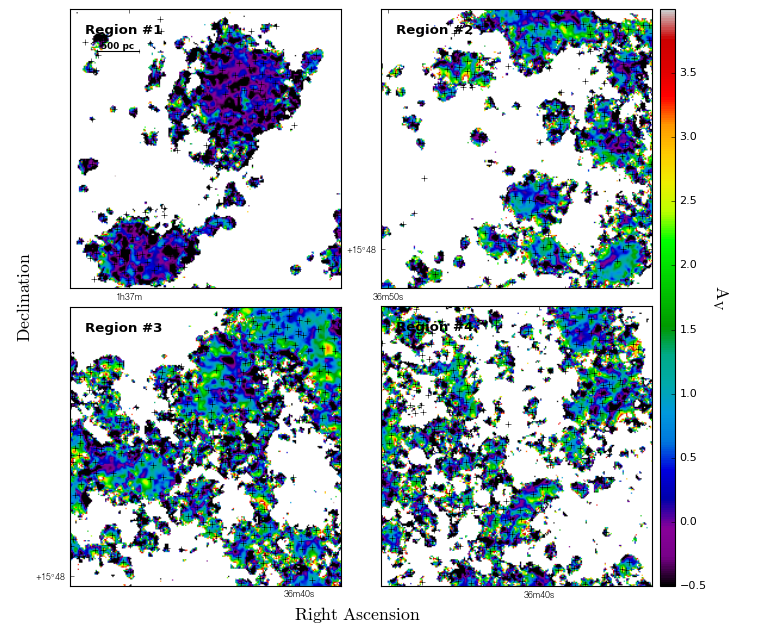

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:80: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:86: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


In [8]:
# Plot the Data 
%matplotlib nbagg

# Set the number of subplots
#nb_row = 3
#nb_col = 2
nb_row = 2
nb_col = 2
elem = [[str('') for i_test in range(0,nb_col)]\
                 for j_test in range(0,nb_row)]

# Creation of the frame with subplots
f, axarr = plt.subplots(nb_row, nb_col, figsize=(9.7,7.92))
f.subplots_adjust(hspace=0.04)
f.subplots_adjust(wspace=0.15)


# Choose X and Y labels

common_x = '$\mathrm{Right\,\,Ascension}$'
common_y = '$\mathrm{Declination}$'
matplotlib.rcParams.update({'font.size': 16.0})
    # and Position
f.text(0.46, 0.02, common_x, ha='center',size=16.0)
f.text(0.02, 0.53, common_y, va='center', rotation='vertical',size=16)

# Plot the Images
cbarlimit = (-0.5,4.0)
a1 = axarr[0][0].imshow(image_data, cmap='nipy_spectral', clim=cbarlimit )
a2 = axarr[0][1].imshow(image_data, cmap='nipy_spectral', clim=cbarlimit )
a3 = axarr[1][0].imshow(image_data, cmap='nipy_spectral', clim=cbarlimit )
a4 = axarr[1][1].imshow(image_data, cmap='nipy_spectral', clim=cbarlimit )

# Plot the Color Scale

cbar_ax = f.add_axes([0.85,0.074,0.02,0.911])
cbar_obj = f.colorbar(a1, cax = cbar_ax)
cbar_obj.set_label('$\mathrm{A_V}$', rotation=270, fontsize=16, labelpad=20)
cbar_obj.set_ticks([-0.5,0,0.5,1.0,1.5,2.0,2.5,3.0,3.5])
cbar_obj.ax.tick_params(labelsize=10)  

#1
xlow1 = 362
xmax1 = 590
ylow1 = 550
ymax1 = 785

#2
xlow2 = 862
xmax2 = 1090
ylow2 = 840
ymax2 = 1075

#3
xlow3 = 1122
xmax3 = 1350
ylow3 = 865
ymax3 = 1100

#4
xlow4 = 1182
xmax4 = 1410
ylow4 = 574
ymax4 = 810


# Plot the Predefined Ticks

test = np.array(xxxx)
xxxxx21=[X for X in list(xxxxx) if (X >= xlow1 and X <= xmax1)]
xxxx21=test[np.where(xxxxx == xxxxx21)]
xxxxx22=[X for X in list(xxxxx) if (X >= xlow2 and X <= xmax2)]
xxxx22=test[np.where(xxxxx == xxxxx22)]
xxxxx23=[X for X in list(xxxxx) if (X >= xlow3 and X <= xmax3)]
xxxx23=test[np.where(xxxxx == xxxxx23)]
xxxxx24=[X for X in list(xxxxx) if (X >= xlow4 and X <= xmax4)]
xxxx24=test[np.where(xxxxx == xxxxx24)]
    
test = np.array(yyyy)
yyyyy21=[Y for Y in list(yyyyy) if (Y >= ylow1 and Y <= ymax1)]
yyyy21=test[np.where(yyyyy == yyyyy21)]
yyyyy22=[Y for Y in list(yyyyy) if (Y >= ylow2 and Y <= ymax2)]
yyyy22=test[np.where(yyyyy == yyyyy22)]
yyyyy23=[Y for Y in list(yyyyy) if (Y >= ylow3 and Y <= ymax3)]
yyyy23=test[np.where(yyyyy == yyyyy23)]
yyyyy24=[Y for Y in list(yyyyy) if (Y >= ylow4 and Y <= ymax4)]
yyyy24=test[np.where(yyyyy == yyyyy24)]

a1.cmap.set_over('w')
a2.cmap.set_over('w')
a3.cmap.set_over('w')
a4.cmap.set_over('w')
a1.cmap.set_under('k')
a2.cmap.set_under('k')
a3.cmap.set_under('k')
a4.cmap.set_under('k')


# Plot the Images

a1 = axarr[0][0].imshow(image_data, cmap='nipy_spectral', clim=cbarlimit)
axarr[0][0].set_xlim(xlow1,xmax1)
axarr[0][0].set_ylim(ylow1,ymax1)
a2 = axarr[0][1].imshow(image_data, cmap='nipy_spectral', clim=cbarlimit)
axarr[0][1].set_xlim(xlow2,xmax2)
axarr[0][1].set_ylim(ylow2,ymax2)
a3 = axarr[1][0].imshow(image_data, cmap='nipy_spectral', clim=cbarlimit)
axarr[1][0].set_xlim(xlow3,xmax3)
axarr[1][0].set_ylim(ylow3,ymax3)
a4 = axarr[1][1].imshow(image_data, cmap='nipy_spectral', clim=cbarlimit)
axarr[1][1].set_xlim(xlow4,xmax4)
axarr[1][1].set_ylim(ylow4,ymax4)

    

# Plot the Predefined Ticks

axarr[0][0].set_xticks(xxxxx21)
axarr[0][0].set_xticklabels(xxxx21, fontsize=8, fontname='Helvetica')
axarr[0][1].set_xticks(xxxxx22)
axarr[0][1].set_xticklabels(xxxx22, fontsize=8, fontname='Helvetica')
axarr[1][0].set_xticks(xxxxx23)
axarr[1][0].set_xticklabels(xxxx23, fontsize=8, fontname='Helvetica')
axarr[1][1].set_xticks(xxxxx24)
axarr[1][1].set_xticklabels(xxxx24, fontsize=8, fontname='Helvetica')

axarr[0][0].set_yticks(yyyyy21)
axarr[0][0].set_yticklabels(yyyy21, fontsize=8, fontname='Helvetica')
axarr[0][1].set_yticks(yyyyy22)
axarr[0][1].set_yticklabels(yyyy22, fontsize=8, fontname='Helvetica')
axarr[1][0].set_yticks(yyyyy23)
axarr[1][0].set_yticklabels(yyyy23, fontsize=8, fontname='Helvetica')
axarr[1][1].set_yticks(yyyyy24)
axarr[1][1].set_yticklabels(yyyy24, fontsize=8, fontname='Helvetica')


# Plot the Ha Peaks Positions 
axarr[0][0].plot(regx, regy, '+k', markersize=5)
axarr[0][1].plot(regx, regy, '+k', markersize=5)
axarr[1][0].plot(regx, regy, '+k', markersize=5)
axarr[1][1].plot(regx, regy, '+k', markersize=5)

# Define the Scale of that_amount_of_pc Line Position
#that_amount_of_pc = 1000
that_amount_of_pc = 500
pc = str(that_amount_of_pc)+' pc' 
xlinelow = xlow1 + (xmax1-xlow1) * 0.1
xlinemax = xlow1 + (xmax1-xlow1) * 0.1 + 7.07/100 * that_amount_of_pc 
ylinelow = ylow1 + (ymax1-ylow1) * 0.85
ylinemax = ylow1 + (ymax1-ylow1) * 0.85


# Plot the Scale of that_amount_of_pc Line Position
axarr[0][0].add_line(Line2D([xlinelow, xlinemax], [ylinelow, ylinemax], color='k', linewidth=1, marker='|', markersize=3))
axarr[0][0].annotate(pc, xy = [(xlinemax + xlinelow)/2, (ylinemax + ylinelow)/2 + 0.0025*(ylinemax + ylinelow)], \
             ha = 'center', va = 'center', fontsize = 8, fontname = 'Times', color = 'k',fontweight='bold')




# Modification of the Plot area and the Axis Labels
f.subplots_adjust(top=0.99)
f.subplots_adjust(bottom=0.069)
f.subplots_adjust(left=0.09)
f.subplots_adjust(right=0.84)

# Add white contour on each images
for i in range(0,2):
    for j in range(0,2):
        for z in ['bottom', 'top', 'left', 'right']:
            axarr[i][j].spines[z].set_color('k')
            axarr[i][j].spines[z].set_linewidth(1)
            
# Add annotation
elem[0][0] = 'Region #1'
elem[0][1] = 'Region #2'
elem[1][0] = 'Region #3'
elem[1][1] = 'Region #4'

for i_row in range(0,nb_row):
    for i_col in range(0,nb_col):
        axarr[i_row][i_col].annotate(elem[i_row][i_col],xy=(0.34,0.9),xycoords='axes fraction',\
            fontsize=12.0, horizontalalignment='right',verticalalignment='bottom', color='k', fontweight='bold')

In [11]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_Ha_Hb_Av_regions.eps')
#plt.savefig('test.png', dpi=1000)

<IPython.core.display.Javascript object>


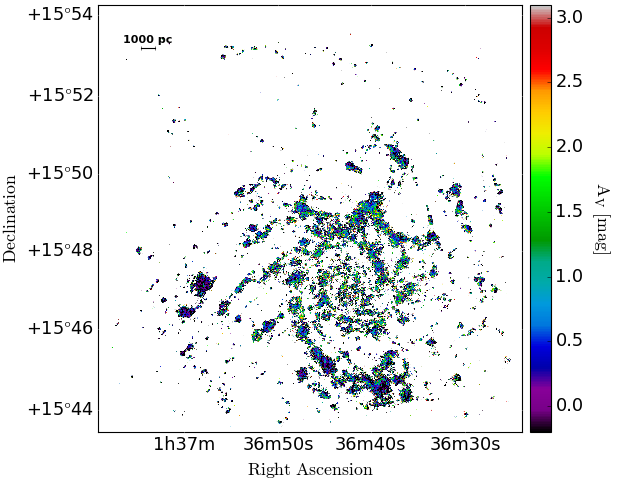

In [9]:
# Plot the Data 
%matplotlib nbagg


fig = plt.figure(figsize=(8,6))
cs = plt.imshow(image_data, cmap='spectral')
cs.cmap.set_over('w')
cs.cmap.set_under('k')

# Plot the Color Scale
cbar=plt.colorbar(ticks=[0,0.5,1,1.5,2.0,2.5,3.0,3.5],pad=0.01)
cbar.set_label('$\mathrm{A_V\,\,[mag]}$', rotation=270, fontsize=16, labelpad=25)
plt.clim(-0.2,3.1)


# Define the Data Plot Area
xlow = 0
xmax = 2048
ylow = 0
ymax = 2064

#1
#xlow = 362
#xmax = 590
#ylow = 550
#ymax = 785
##2
#xlow = 862
#xmax = 1090
#ylow = 840
#ymax = 1075
##3
#xlow = 1122
#xmax = 1350
#ylow = 865
#ymax = 1100
#4
#xlow = 1182
#xmax = 1410
#ylow = 574
#ymax = 810

plt.xlim(xlow,xmax)
plt.ylim(ylow,ymax)

# Define the Scale of that_amount_of_pc Line Position
that_amount_of_pc = 1000
pc = str(that_amount_of_pc)+' pc' 
xlinelow = xlow + (xmax - xlow) * 0.1
xlinemax = xlow + (xmax - xlow) * 0.1 + 7.07/100 * that_amount_of_pc 
ylinelow = ylow + (ymax - ylow) * 0.9
ylinemax = ylow + (ymax - ylow) * 0.9

# Plot the Scale of that_amount_of_pc Line Position
plt.plot([xlinelow, xlinemax], [ylinelow, ylinemax], color='k', linewidth=1, marker = '|', markersize=3)
plt.annotate(pc, xy = [(xlinemax + xlinelow)/2, (ylinemax + ylinelow)/2 + 0.01*(ylinemax + ylinelow)], \
             ha = 'center', va = 'center', fontsize = 10, fontname = 'Times', color = 'k',fontweight='bold')

# Plot the Predefined Ticks

test = np.array(xxxx)
xxxxx2=[X for X in list(xxxxx) if (X >= xlow and X <= xmax)]
xxxx2=test[np.where(xxxxx == xxxxx2)]
    
test = np.array(yyyy)
yyyyy2=[Y for Y in list(yyyyy) if (Y >= ylow and Y <= ymax)]
yyyy2=test[np.where(yyyyy == yyyyy2)]

plt.xticks(xxxxx2,xxxx2)
plt.yticks(yyyyy2,yyyy2)
plt.tick_params(color='w', length=5)

# Plot the Ha Peaks Positions 
#plt.plot(regx, regy, '+k', markersize=5)

# Modification of the Plot area and the Axis Labels
plt.xlabel('$\mathrm{Right\,\,Ascension}$', fontsize=16, fontname='Helvetica')
plt.ylabel('$\mathrm{Declination}$', fontsize=16, fontname='Helvetica')
plt.subplots_adjust(top=0.99)
plt.subplots_adjust(bottom=0.1)
plt.subplots_adjust(left=-0.15)
plt.subplots_adjust(right=1.00)

In [29]:
#Save the Plot in a .eps or .png file
fig.savefig('NGC628_Av_Tout.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

In [9]:
# Galactocentric radius position of each pixel on the field of view 
# from idl cor_inclinaison.pro
r= fits.open('NGC628_SITELLE_rayon_pc_carte.fits')
r.info()
ra = r[0].data
r.close()

Filename: NGC628_SITELLE_rayon_pc_carte.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater


<IPython.core.display.Javascript object>


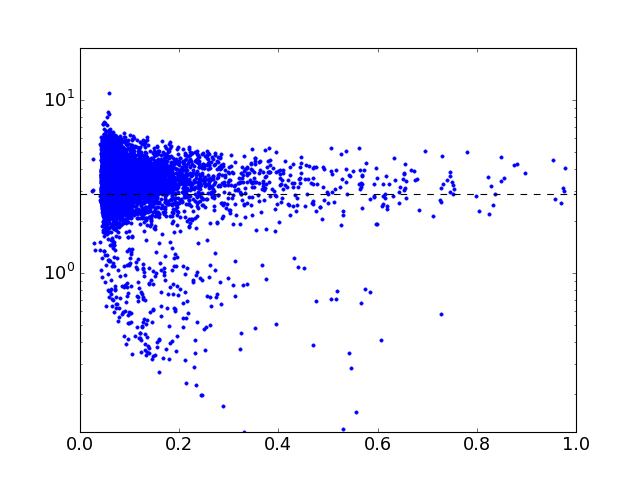

In [72]:
%matplotlib nbagg
from matplotlib import pyplot

indice= [(aimage_data1 >1e-17) * (aimage_data2 >5e-18)]
pyplot.plot((aimage_data2[indice]*fimage_data2[indice]/1e-16), ((aimage_data1[indice]*fimage_data1[indice])/(aimage_data2[indice]*fimage_data2[indice])), '.' )
pyplot.yscale('log')
plt.xlim(0,1)
plt.ylim(0,20)
plt.axhline(2.87, color='k', linestyle='--')

plt.show()

In [27]:
r = fits.getdata('NGC628_regions_rayons.fits')
flux_ha = fits.getdata('NGC628_SN3.regions.Ha6563_flux.fits')
flux_hb = fits.getdata('NGC628_SN3.regions.Hb4861_flux.fits')
flux_ha_err = fits.getdata('NGC628_SN3.regions.Ha6563_flux_error.fits')
flux_hb_err = fits.getdata('NGC628_SN3.regions.Hb4861_flux_error.fits')

In [51]:
print np.median(image_data[(aimage_data1 >= 1e-16) & (sn > lim) & (ra < 10000)])
print np.median(image_data[(aimage_data1 >= 3e-17) & (sn > lim) & (ra < 10000)])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater_equal
  from ipykernel import kernelapp as app


0.875028
0.775602


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


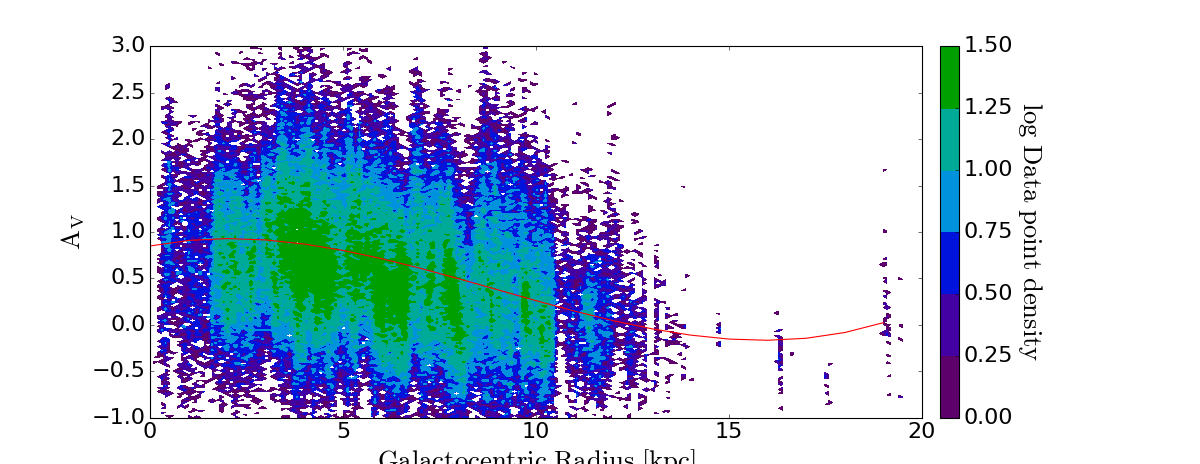

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in greater_equal
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10


[  8.26383439e-04  -2.22558299e-02   8.10226944e-02   8.49421372e-01]
           3           2
0.0008264 x - 0.02226 x + 0.08102 x + 0.8494


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in greater_equal


In [22]:
%matplotlib nbagg

#limite de snr
lim=6

fig = plt.figure(figsize=(15,5.8))
ax = fig.add_subplot(111)
H, xedges, yedges = np.histogram2d(image_data[(aimage_data1 >= 4e-18) & (sn > lim)],ra[(aimage_data1 >= 4e-18) & (sn > lim)]/1000,range=[[-1,3],[0,20]], bins=(200,200))
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
levels = (0,0.25,0.5,0.75,1,1.25,1.5)
plt.contourf(np.log10(H), levels, extent=extent,cmap='nipy_spectral')
plt.xlim(0,20)
plt.ylim(-1,3)
image_data2 = np.zeros([2064,2048])
image_data2[0:2064,0:2048] = image_data[0:2064,0:2048]
image_data2[(ra > 10000)] = 0
p=[(image_data2 >= -1) & (image_data2 <= 3)& (aimage_data1 >= 4e-18)]
y=np.polyfit(ra[p]/1000,image_data2[p],3)
print y
#y[3]=y[3]+0.1
#y[2]=y[2]*1.5
#y[1]=y[1]*1.6
#y[0]=y[0]*1.5
yy = np.poly1d(y)
print yy
plt.plot(np.arange(20),yy(np.arange(20)), color='r')
cbar=plt.colorbar(ticks=[0,0.25,0.5,0.75,1,1.25,1.5],pad=0.02)
cbar.set_label('$\mathrm{log\,\,Data\,\,point\,\,density}$', rotation=270, fontsize=24, fontname = 'Helvetica', labelpad=28)
cbar.ax.tick_params(labelsize=20)
plt.clim(0,3)

plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=24, fontname = 'Helvetica')
plt.ylabel('$\mathrm{A_V}$', fontsize=24, fontname = 'Helvetica')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
# Show the boundary between the regions:
plt.show()

In [14]:
fig.savefig('NGC628_Av_plot.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)

In [32]:
print flux_ha_err

[  1.34052558e-17   1.34049296e-17   6.02934489e-17 ...,   2.15867421e-17
   2.90263580e-17   4.80174549e-17]


<IPython.core.display.Javascript object>


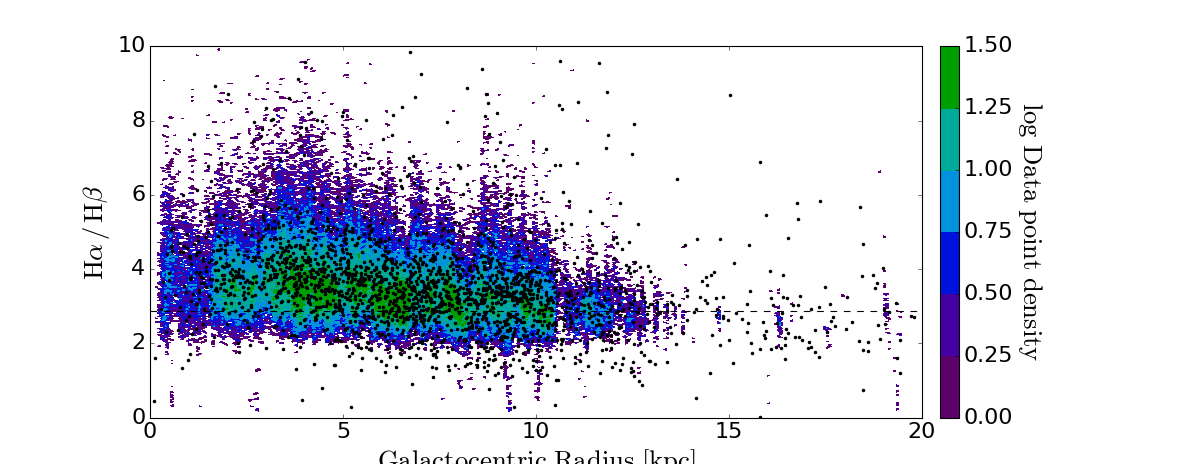

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater_equal
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in greater_equal
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in greater_equal
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in less


17222
126357


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in greater_equal
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less


In [41]:
%matplotlib nbagg

fig = plt.figure(figsize=(15,5.8))
ax = fig.add_subplot(111)
H, xedges, yedges = np.histogram2d(image_dataab[(aimage_data1 >= 4e-18)],ra[(aimage_data1 >= 4e-18)]/1000,range=[[0,10],[0,20]], bins=(350,300))
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
levels = (0,0.25,0.5,0.75,1,1.25,1.5)
plt.contourf(np.log10(H), levels, extent=extent,cmap='nipy_spectral')
plt.xlim(0,20)
plt.ylim(0,10)
image_data2 = np.zeros([2064,2048])
image_data2[0:2064,0:2048] = image_data[0:2064,0:2048]
image_data2[(ra > 10000)] = 0
p=[(image_data2 >= -1) & (image_data2 <= 3)& (aimage_data1 >= 4e-18)]
#y=np.polyfit(ra[p]/1000,image_dataab[p],3)
#print y
#y[3]=y[3]+0.1
#y[2]=y[2]*1.5
#y[1]=y[1]*1.6
#y[0]=y[0]*1.5
#yy = np.poly1d(y)
#print yy
#plt.plot(np.arange(20),yy(np.arange(20)), color='r')
cbar=plt.colorbar(ticks=[0,0.25,0.5,0.75,1,1.25,1.5],pad=0.02)
cbar.set_label('$\mathrm{log\,\,Data\,\,point\,\,density}$', rotation=270, fontsize=24, fontname = 'Helvetica', labelpad=28)
cbar.ax.tick_params(labelsize=20)
plt.clim(0,3)

indice = [(flux_ha_err < 3e-17) & (flux_hb_err < 3e-17)]
plt.scatter(r[indice]/1000, (flux_ha[indice]/flux_hb[indice]), marker='.', linewidths = 0.0, s = 40, c='k')

plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=24, fontname = 'Helvetica')
plt.ylabel(r'$\mathrm{H\alpha\,/\,H\beta}$', fontsize=24, fontname = 'Helvetica')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.axhline(2.87, color='k', linestyle='--')
# Show the boundary between the regions:
plt.show()
print len(image_dataab[(aimage_data1 >= 5e-18) & (image_dataab > 0)& (image_dataab < 2.75)])
print len(image_dataab[(aimage_data1 >= 5e-18) & (image_dataab > 0)& (image_dataab < 15)])



In [17]:
fig.savefig('NGC628_HaHb_plot.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)

Filename: NGC628_HIIPhot3_All_GROW.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
2064


IndexError: too many indices for array

In [15]:
gr= fits.open('NGC628_HIIPhot3_All_GROW.fits')
gr.info()
grow = gr[0].data
gr.close()

Filename: NGC628_HIIPhot3_All_GROW.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   


In [30]:
snr = fits.getdata('NGC628_regions_hbmean_snr.fits')
rr = np.zeros(4285)


print len(ra)
for i in range(0,4285):
    
    xxyy = np.where(grow == i+1)
    rr[i] = np.mean(ra[xxyy[0],xxyy[1]])


2064


In [33]:
fits.writeto('NGC628_regions_rayons.fits', rr)

In [34]:
hahbv = fits.getdata('NGC628_regions_hahbv.fits')


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


<IPython.core.display.Javascript object>


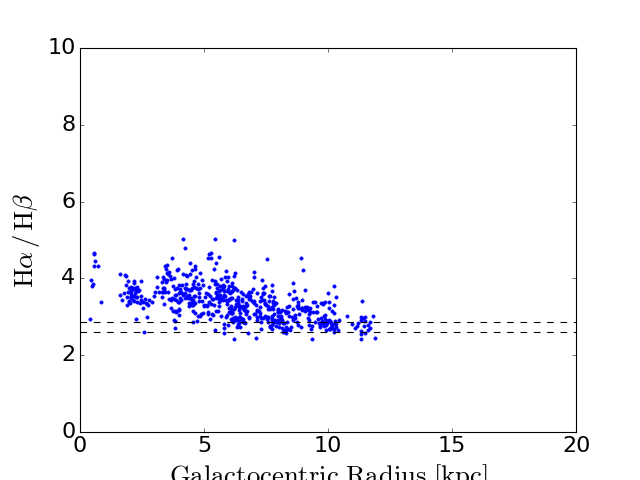

In [42]:
%matplotlib nbagg

plt.plot(rr[(snr>10)]/1000, hahbv[(snr>10)],'.')
plt.xlim(0,20)
plt.ylim(0,10)

#y=np.polyfit(ra[p]/1000,image_dataab[p],3)
#print y
#y[3]=y[3]+0.1
#y[2]=y[2]*1.5
#y[1]=y[1]*1.6
#y[0]=y[0]*1.5
#yy = np.poly1d(y)
#print yy
#plt.plot(np.arange(20),yy(np.arange(20)), color='r')

plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=24, fontname = 'Helvetica')
plt.ylabel(r'$\mathrm{H\alpha\,/\,H\beta}$', fontsize=24, fontname = 'Helvetica')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.axhline(2.87, color='k', linestyle='--')
plt.axhline(2.6, color='k', linestyle='--')
# Show the boundary between the regions:
plt.show()